# Plot Training Logs : PPO_cartpole (no fun emoji sadly)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

##### Listing the available files

In [41]:
files = glob.glob('../models/PPO_Cartpole*_log.csv')
for no, file in enumerate(files):
    fname = file.replace('_', ' ')
    print(f"{no:2d} | {fname}")

 0 | ../models\PPO Cartpole 24-08-09 11-59 log.csv


In [42]:
choice = -1 # Make your choice here

##### Printing the hyperparameters

In [43]:
print('Hyperparameters \n' + '-'*40)
with open(files[choice].replace('log.csv','prms.json')) as jfile:
    prms = json.load(jfile)
    for key, val in prms.items():
        print(f'{key:25s} : {val}')


Hyperparameters 
----------------------------------------
MAX_STEPS                 : 150000
GAMMA                     : 0.995
DROPOUT_RATE              : 0
L2_ALPHA                  : 0
SCHEDULER_PATIENCE        : 100
SCHEDULER_MIN_LR          : 1e-05
SCHEDULER_FACTOR          : 0.5
ACTOR_SIZE                : 4
ACTOR_LR                  : 0.005
CRITIC_SIZE               : 4
CRITIC_LR                 : 0.01
BUFFER_SIZE               : 300
UPDATE_EPOCHS             : 5
PPO_CLIP_VAL              : 0.2
ENTROPY_BETA              : 0.001


##### Plotting the data

In [44]:
df = pd.read_csv(files[choice])

In [45]:
df

,episode,step,time,cum_reward,a_loss,c_loss,e_loss,action_0,action_1,actor_lr,critic_lr,just_updated
0,0,15,0.009578,15.0,0.000000,0.000000,0.000000,0.400000,0.600000,0.005000,0.01000,0
1,1,15,0.016178,15.0,0.000000,0.000000,0.000000,0.400000,0.600000,0.005000,0.01000,0
2,2,11,0.020195,11.0,0.000000,0.000000,0.000000,0.181818,0.818182,0.005000,0.01000,0
3,3,13,0.026445,13.0,0.000000,0.000000,0.000000,0.461538,0.538462,0.005000,0.01000,0
4,4,13,0.030493,13.0,0.000000,0.000000,0.000000,0.384615,0.615385,0.005000,0.01000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
633,633,500,75.559449,500.0,-0.000117,2146.365234,0.503164,0.502000,0.498000,0.000625,0.00125,1
634,634,500,75.826360,500.0,-0.000177,1867.943359,0.529096,0.500000,0.500000,0.000625,0.00125,1
635,635,500,76.111242,500.0,-0.000360,2105.478516,0.505043,0.500000,0.500000,0.000625,0.00125,1
636,636,500,76.395290,500.0,-0.000374,2171.071777,0.506428,0.498000,0.502000,0.000625,0.00125,1


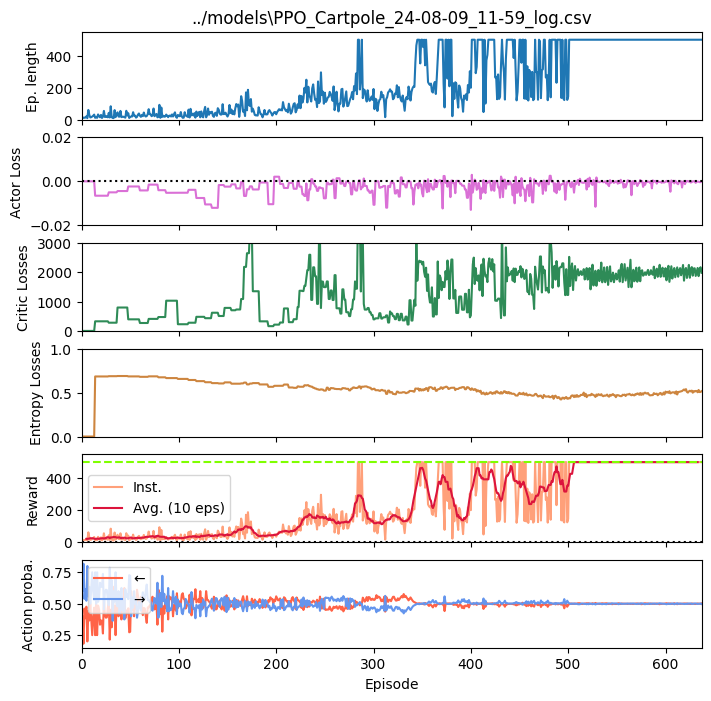

In [55]:
fig, axes = plt.subplots(nrows=6, sharex=True, figsize=[8,8])

axes[0].plot(df['episode'], df['step'])
axes[1].plot(df['episode'], df['a_loss'], color='orchid')
axes[2].plot(df['episode'], df['c_loss'], color='seagreen')
axes[3].plot(df['episode'], df['e_loss'], color='peru')
axes[4].plot(df['episode'], df['cum_reward'], color='lightsalmon', label='Inst.')
axes[4].plot(df['episode'], df['cum_reward'].rolling(10, center=True).mean(), color='crimson', label='Avg. (10 eps)')
axes[5].plot(df['episode'], df['action_0'], color='tomato', label='←')
axes[5].plot(df['episode'], df['action_1'], color='cornflowerblue', label='→')

# Formatting

axes[0].set_title(files[choice])
axes[0].set_ylim([0, 550])
axes[0].set_ylabel('Ep. length')

axes[1].set_ylim([-0.02,0.02])
axes[1].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[1].set_ylabel('Actor Loss')

axes[2].set_ylim([0,3000])
axes[2].set_ylabel('Critic Losses')

axes[3].set_ylabel('Entropy Losses')
axes[3].set_ylim([0,1])

axes[4].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[4].plot(df['episode'], 500 * np.ones_like(df['cum_reward']), '--', color='chartreuse')
axes[4].set_ylabel('Reward')
axes[4].set_ylim([0,550])
axes[4].legend()

axes[5].set_ylabel('Action proba.')
axes[5].legend()
axes[5].set_xlim([0, df['episode'].max()])
axes[5].set_xlabel('Episode')


fig.savefig(files[choice].replace('log.csv','fig.png'))